# Decide thresholds

This notebook is examining the distribution of the mapping rates to be used for binning.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import fill
from core_acc_modules import paths

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Log files
pao1_logs_filename = paths.PAO1_LOGS
pa14_logs_filename = paths.PA14_LOGS

In [3]:
pao1_logs = pd.read_csv(pao1_logs_filename, index_col=0, header=0)
pa14_logs = pd.read_csv(pa14_logs_filename, index_col=0, header=0)

In [4]:
pao1_logs.head()

,lib_types,reads_processed,reads_mapped,mapping_rate,run,job
exp_num,,,,,,
SRP090296/SRX2185323/SRX2185323,[u'SF'],47468450,5240148,11.039223,78041,2724
ERP105395/ERX2259197/ERX2259197,[u'U'],34109390,16420150,48.139676,78036,984
SRP017679/SRX2366135/SRX2366135,[u'U'],9912084,4322668,43.610082,78042,1232
SRP038697/SRX474161/SRX474161,[u'SF'],710589,93493,13.157113,78041,2560
SRP062215/SRX1140456/SRX1140456,[u'SF'],6598795,470748,7.133848,78042,1439


In [5]:
pa14_logs.head()

,lib_types,reads_processed,reads_mapped,mapping_rate,run,job
exp_num,,,,,,
SRP090296/SRX2185323/SRX2185323,[u'U'],47468450,12406964,26.137285,77697,2724
ERP105395/ERX2259197/ERX2259197,[u'U'],34109390,15187523,44.525930,77223,984
SRP017679/SRX2366135/SRX2366135,[u'U'],9912084,4302910,43.410750,77436,1232
SRP038697/SRX474161/SRX474161,[u'SF'],710589,102499,14.424513,77697,2560
SRP062215/SRX1140456/SRX1140456,[u'SF'],6598795,466716,7.072746,77436,1439


/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.01, 0.5, 'Count')

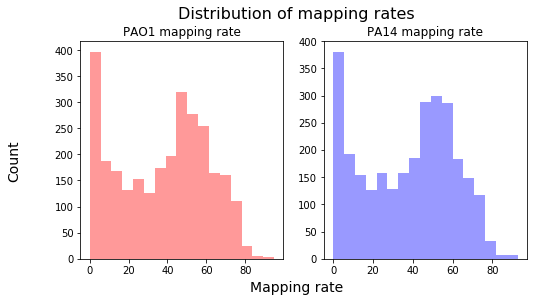

In [6]:
# Plot distribution of mapping rates to PAO1 and PA14

# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

# Distribution plot for core genes
sns.distplot(
    pao1_logs["mapping_rate"],
    label="PAO1 mapping rate",
    color="red",
    kde=False,
    ax=axes[0],
)

sns.distplot(
    pa14_logs["mapping_rate"],
    label="PA14 mapping rate",
    color="blue",
    kde=False,
    ax=axes[1],
)

plt.suptitle(fill("Distribution of mapping rates", width=40), x=0.5, y=1, fontsize=16)
axes[0].set_title(fill("PAO1 mapping rate", width=20))
axes[1].set_title(fill("PA14 mapping rate", width=20))
axes[0].set_xlabel("")
axes[1].set_xlabel("")
fig.text(0.5, 0.01, "Mapping rate", ha="center", fontsize=14)
fig.text(0.01, 0.5, "Count", ha="center", rotation=90, fontsize=14)

Text(0.01, 0.5, 'Count')

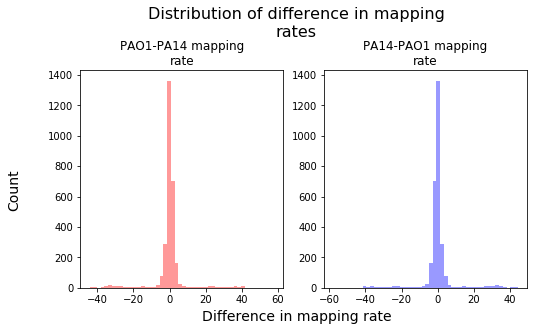

In [8]:
# Plot distribution of difference mapping rates to PAO1 and PA14

# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

# Distribution plot for core genes
sns.distplot(
    pao1_logs["mapping_rate"] - pa14_logs["mapping_rate"],
    label="PAO1 mapping rate",
    color="red",
    kde=False,
    ax=axes[0],
)

sns.distplot(
    pa14_logs["mapping_rate"] - pao1_logs["mapping_rate"],
    label="PA14 mapping rate",
    color="blue",
    kde=False,
    ax=axes[1],
)

plt.suptitle(
    fill("Distribution of difference in mapping rates", width=40),
    x=0.5,
    y=1.1,
    fontsize=16,
)
axes[0].set_title(fill("PAO1-PA14 mapping rate", width=20))
axes[1].set_title(fill("PA14-PAO1 mapping rate", width=20))
axes[0].set_xlabel("")
axes[1].set_xlabel("")
fig.text(0.5, 0.01, "Difference in mapping rate", ha="center", fontsize=14)
fig.text(0.01, 0.5, "Count", ha="center", rotation=90, fontsize=14)

**Observations:**
* There is fairly rough bimodal distribution, so most samples align well to PAO1 reference or the PA14 reference.

**Takeaway:**
* Based on the mapping rate distribution, looks like a mapping rate of 30% would be a good cutoff to identify those samples that have a high mapping to PAO1 or PA14
* Since PAO1 and PA14 have a larged shared core genome, we need to add an additional criteria to filter for those that are specific to PAO1 versus PA14. This additional criteria will use the difference in mapping rates

A sample will be PAO1 if:
1. PAO1 mapping rate >= 30%
2. PAO1-PA14 mapping rate > 0%

Similarly for PA14 samples.